Veamos una primera vista del dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/MRegularSeasonDetailedResults.csv')
df.head(5)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


# Estudio de Nuevas Variables

Las estadísticas proporcionadas por cada equipo son:
* FGM: Tiros de campo anotados
* FGA: TIros de campo intentados
* FGM3: Triples Anotados
* FGA3: Triples intentados
* FTM: Tiros libres anotados
* FTA: Tiros libres intentados
* OR: Rebites ofensivos
* DR: Rebotes defensivos
* Ast: Asistencias
* TO: Perdidas de balón
* Stl: Robos de balón
* Blk: Bloqueos
* PF: Faltas personales

Ahora bien, de cara al análisis de un partido:
Consideraciones:
- Siempre ganara el equipo que tenga la suma de **FGM** + **FGM3** + **FTM** más grande
- La columna WScore y LScore es combinación lineal de las otras 3

* Una de las estadísticas más relevante es **Asists-To-Turnover-Ratio** indica por cada asistencia que das, cuantas perdidas de balón tienes
* Otra estadistica importante es: **Margen de rebotes Ofensivos y rebotes defensivos**: De los tiros no anotados, habrá rebote, es importante saber quien gana más rebotes en porcentaje. Permite saber, de todos los rebotes que hay en el partido, cuntos consigues ganar.
* Los tiros libres, suelen ser tiros donde lo más importante es la precisión/comportamiento bajo presión de los jugadores. Juzgar el accuracy o el porcentaje puede ser importante. De momento se deja en accuracy, estaría bien mirar si podemos deducir si hay presión o no.
* Asistencias sobre Field Goal: Nos permetirá saber como de bien mueve un equipo el balón. De todas las anotaciones, cuantas vienen de pases/construcción del equipo


Based on (https://www.breakthroughbasketball.com/stats/how-we-use-stats-Hagness.html)

In [3]:
# Create a new column for Assists-TurnOver-Ratio
df['WATR'] = df['WAst'] / df['WTO']
df['LATR'] = df['LAst'] / df['LTO']


# Margen de rebotes ofensivos ganados
df['WOffR'] = df['WOR'] / (df['WOR'] + df['LDR'])
df['LOffR'] = df['LOR'] / (df['LOR'] + df['WDR'])
# Margen de rebotes defensivos ganados
df['WDefR'] = df['WDR'] / (df['WDR'] + df['LOR'])
df['LDefR'] = df['LDR'] / (df['LDR'] + df['WOR'])


# Field Throw Accuracy (FTAcc)
df['WFTAcc'] = df['WFTM'] / df['WFTA']
df['LFTAcc'] = df['LFTM'] / df['LFTA']


# Assist-Field Goal Ratio (AFGR)
df['WAFGR'] = df['WAst'] / (df['WFGM']+df['WFGM3'])
df['LAFGR'] = df['LAst'] / (df['LFGM']+df['LFGM3'])


Ahora hemos creado nuevas columnas con los valores para cada equipo. Vamos a comprobar si la nueva información agregada al dataframe es significativa.

#### Asists2TurnOver Ratio

El 0.7175567090947877 de los equipos que ganan tienen un WATR mayor que el LATR
El 0.27188366635852945 de los equipos que pierden tienen un WATR menor o igual que el LATR


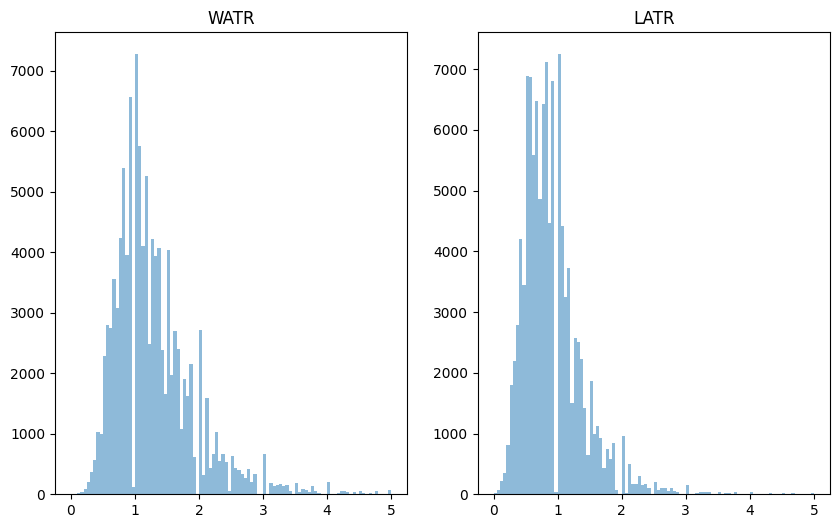

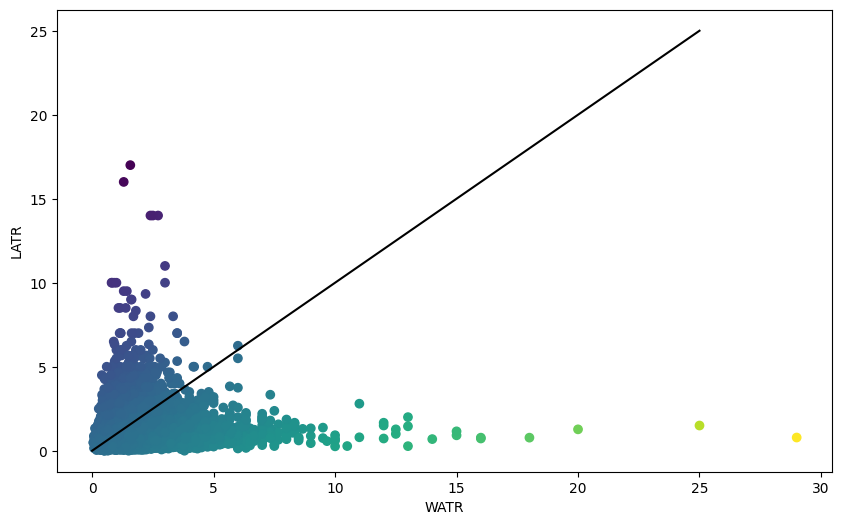

In [4]:
# Compare distributions of WATR and LATR
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WATR'], bins=100, alpha=0.5, label='WATR', range=(0, 5))
ax[1].hist(df['LATR'], bins=100, alpha=0.5, label='LATR', range=(0, 5))
ax[0].set_title('WATR')
ax[1].set_title('LATR')

# Substract values and represent them ina scatterplot
df['WATR-LATR'] = df['WATR'] - df['LATR']
plt.figure(figsize=(10, 6))
plt.scatter(x=df['WATR'], y=df['LATR'], c=df['WATR-LATR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25], 'k-')
plt.xlabel('WATR')
plt.ylabel('LATR')

print(F"El {(df['WATR-LATR']>0).sum()/len(df['WATR-LATR'])} de los equipos que ganan tienen un WATR mayor que el LATR")
print(f"El {(df['WATR-LATR']<0).sum()/len(df['WATR-LATR'])} de los equipos que pierden tienen un WATR menor o igual que el LATR")

#### Offensive and Deffensive Rebound Ratio

##### Ofensivo vs Defensivo

El 0.5975965299011591 de los equipos que ganan tienen un WOffR mayor que el LOffR
El 0.3950792860698286 de los equipos que pierden tienen un WOffR menor o igual que el LOffR


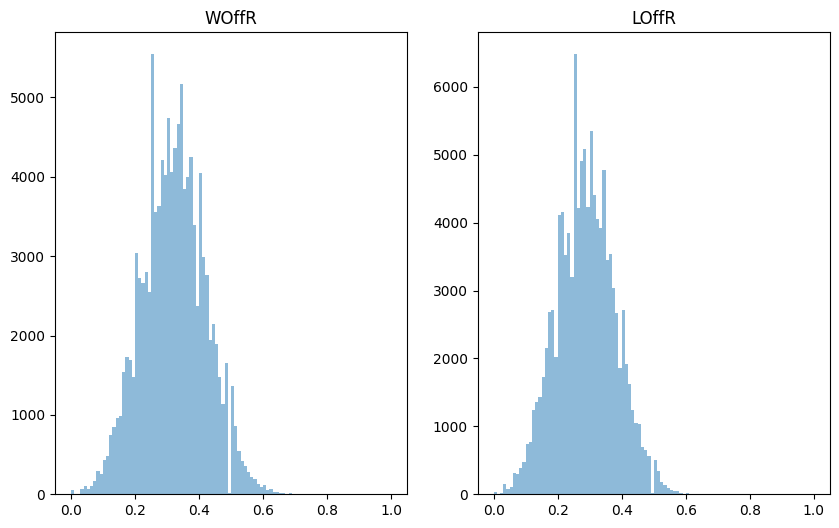

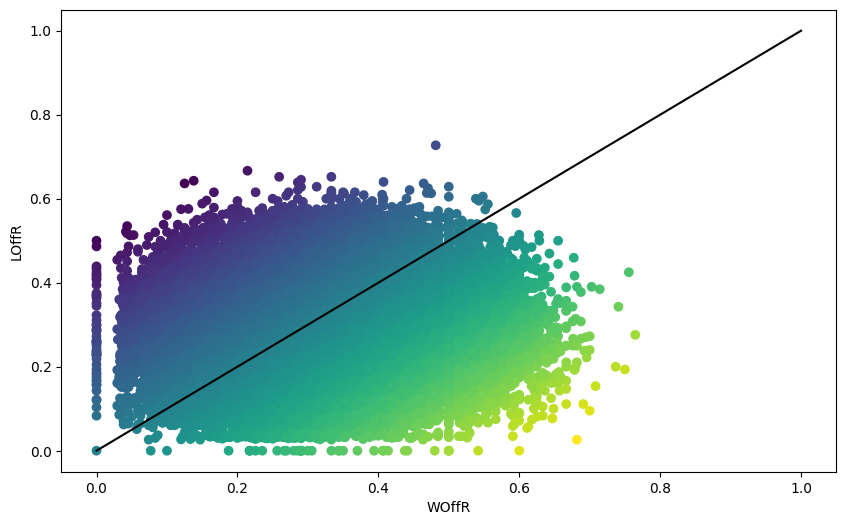

In [5]:
# Compare distributions of WATR and LATR
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WOffR'], bins=100, alpha=0.5, label='WOffR', range=(0, 1))
ax[1].hist(df['LOffR'], bins=100, alpha=0.5, label='LOffR', range=(0, 1))
ax[0].set_title('WOffR')
ax[1].set_title('LOffR')

# Substract values and represent them ina scatterplot
df['WOffR-LOffR'] = df['WOffR'] - df['LOffR']
plt.figure(figsize=(10, 6))
plt.scatter(x=df['WOffR'], y=df['LOffR'], c=df['WOffR-LOffR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 1], [0, 1], 'k-')
plt.xlabel('WOffR')
plt.ylabel('LOffR')

print(F"El {(df['WOffR-LOffR']>0).sum()/len(df['WOffR-LOffR'])} de los equipos que ganan tienen un WOffR mayor que el LOffR")
print(f"El {(df['WOffR-LOffR']<0).sum()/len(df['WOffR-LOffR'])} de los equipos que pierden tienen un WOffR menor o igual que el LOffR")

##### Ofensivo vs Defensivo

El 0.030621133470809928 el equipo ganador tiene un OffR mayor que el DefR del equipo perdedor
El 0.9572992960250302 el equipo perdedor tiene un LDefR mayor o igual que el WOffR


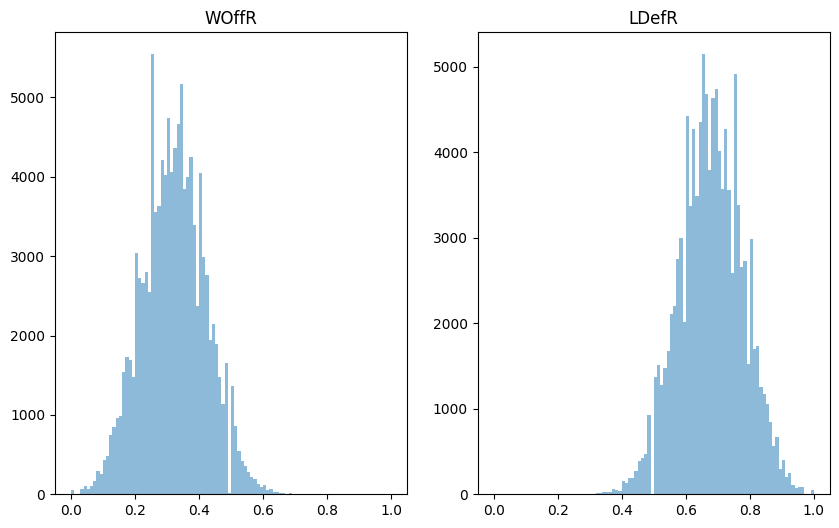

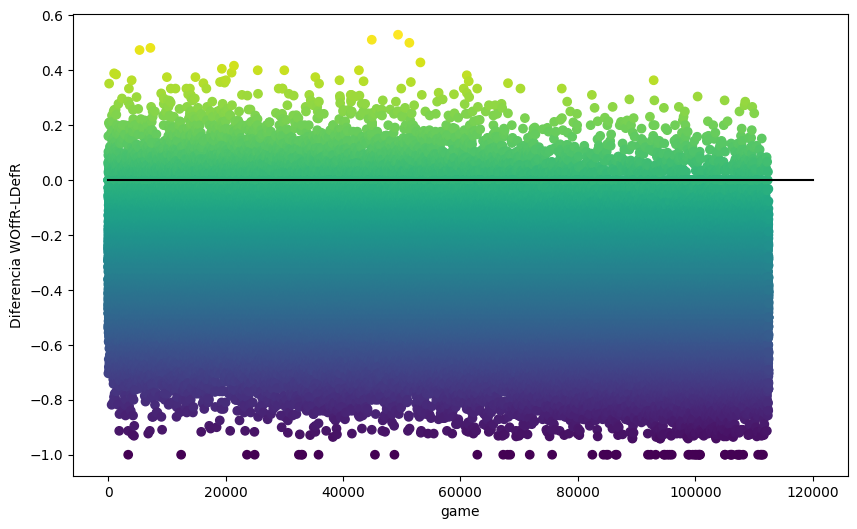

In [6]:
# Compare distributions of WATR and LATR
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WOffR'], bins=100, alpha=0.5, label='WOffR', range=(0, 1))
ax[1].hist(df['LDefR'], bins=100, alpha=0.5, label='LDefR', range=(0, 1))
ax[0].set_title('WOffR')
ax[1].set_title('LDefR')

# Substract values and represent them ina scatterplot
df['WOffR-LDefR'] = df['WOffR'] - df['LDefR']
plt.figure(figsize=(10, 6))
plt.scatter(x=list(range(len(df))), y=df['WOffR-LDefR'], c=df['WOffR-LDefR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 120_000], [0, 0], 'k-')
plt.xlabel('game')
plt.ylabel('Diferencia WOffR-LDefR')

print(F"El {(df['WOffR-LDefR']>0).sum()/len(df['WOffR-LDefR'])} el equipo ganador tiene un OffR mayor que el DefR del equipo perdedor")
print(f"El {(df['WOffR-LDefR']<0).sum()/len(df['WOffR-LDefR'])} el equipo perdedor tiene un LDefR mayor o igual que el WOffR")

Teniendo en cuenta que el equipo ganador pocas veces obtienen más rebotes en ataque que el defensor, no se mirara el caso contrario.

##### Defensivo vs Defensivo

El 0.5975965299011591 el equipo ganador tiene un más DefR mayor que el DefR del equipo perdedor
El 0.3950792860698286 el equipo perdedor tiene un DefR mayor o igual que el DefR del equipo ganador


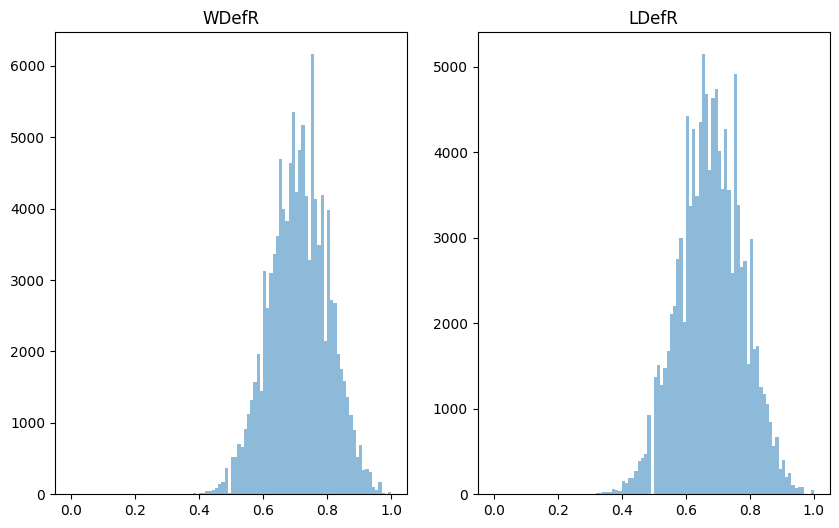

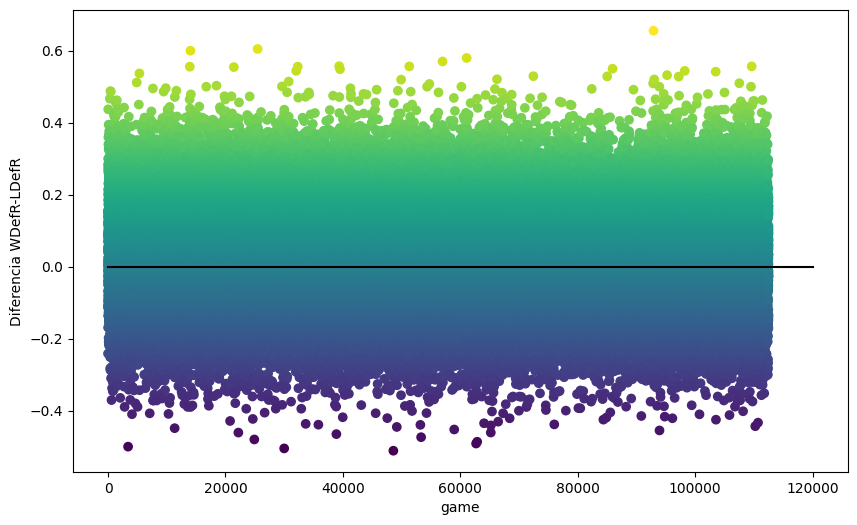

In [7]:
# Compare distributions of WATR and LATR
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WDefR'], bins=100, alpha=0.5, label='WDefR', range=(0, 1))
ax[1].hist(df['LDefR'], bins=100, alpha=0.5, label='LDefR', range=(0, 1))
ax[0].set_title('WDefR')
ax[1].set_title('LDefR')

# Substract values and represent them ina scatterplot
df['WDefR-LDefR'] = df['WDefR'] - df['LDefR']
plt.figure(figsize=(10, 6))
plt.scatter(x=list(range(len(df))), y=df['WDefR-LDefR'], c=df['WDefR-LDefR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 120_000], [0, 0], 'k-')
plt.xlabel('game')
plt.ylabel('Diferencia WDefR-LDefR')

print(F"El {(df['WDefR-LDefR']>0).sum()/len(df['WDefR-LDefR'])} el equipo ganador tiene un más DefR mayor que el DefR del equipo perdedor")
print(f"El {(df['WDefR-LDefR']<0).sum()/len(df['WDefR-LDefR'])} el equipo perdedor tiene un DefR mayor o igual que el DefR del equipo ganador")

Esta comparación nos sirve para ver que los calculos realizados se han hecho de manera correcta.

#### Free Throw

##### Comprobación a nivel global

El 0.5760506293109579 de los equipos que ganan tienen un WFTAcc mayor que el LFTAcc
El 0.4083677024816895 de los equipos que pierden tienen un WATR menor o igual que el LFTAcc


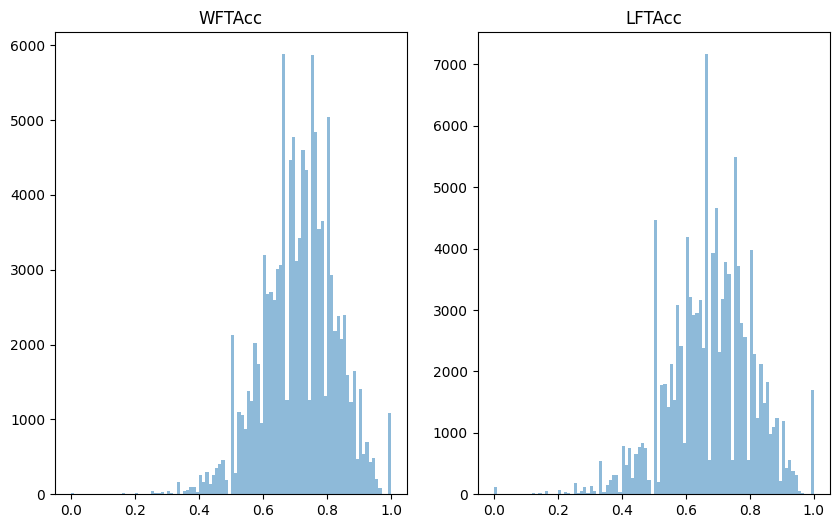

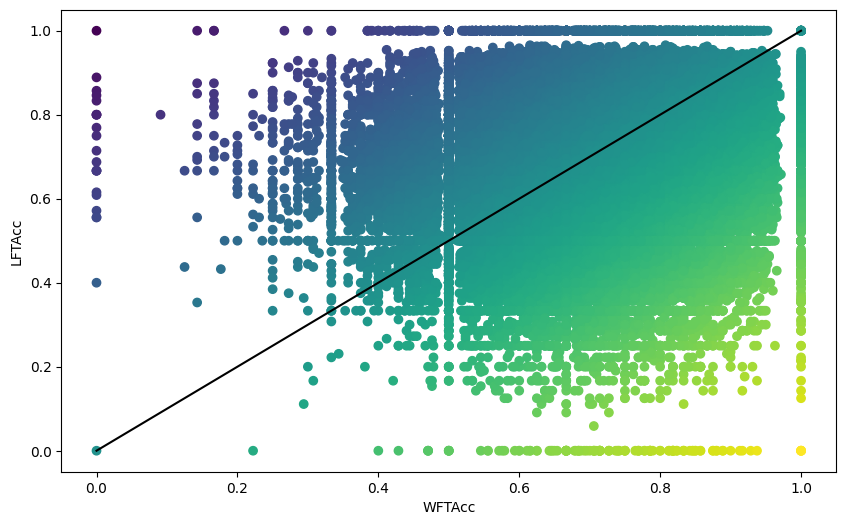

In [8]:
# Check how important is free throw ratio

# Compare distributions of WATR and LFTAcc
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WFTAcc'], bins=100, alpha=0.5, label='WFTAcc', range=(0, 1))
ax[1].hist(df['LFTAcc'], bins=100, alpha=0.5, label='LFTAcc', range=(0, 1))
ax[0].set_title('WFTAcc')
ax[1].set_title('LFTAcc')

# Substract values and represent them ina scatterplot
df['WFTAcc-LFTAcc'] = df['WFTAcc'] - df['LFTAcc']
plt.figure(figsize=(10, 6))
plt.scatter(x=df['WFTAcc'], y=df['LFTAcc'], c=df['WFTAcc-LFTAcc'], cmap='viridis')
# Add diagonal line
plt.plot([0, 1], [0, 1], 'k-')
plt.xlabel('WFTAcc')
plt.ylabel('LFTAcc')

print(F"El {(df['WFTAcc-LFTAcc']>0).sum()/len(df['WFTAcc-LFTAcc'])} de los equipos que ganan tienen un WFTAcc mayor que el LFTAcc")
print(f"El {(df['WFTAcc-LFTAcc']<0).sum()/len(df['WFTAcc-LFTAcc'])} de los equipos que pierden tienen un WATR menor o igual que el LFTAcc")

##### Comprobación en partidos ajustados

/tmp/ipykernel_250386/2797311865.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close_game['WFTAcc-LFTAcc'] = df_close_game['WFTAcc'] - df_close_game['LFTAcc']


El 0.4995416683272887 de los equipos que ganan tienen un WFTAcc mayor que el LFTAcc
El 0.48431708580766014 de los equipos que pierden tienen un WATR menor o igual que el LFTAcc


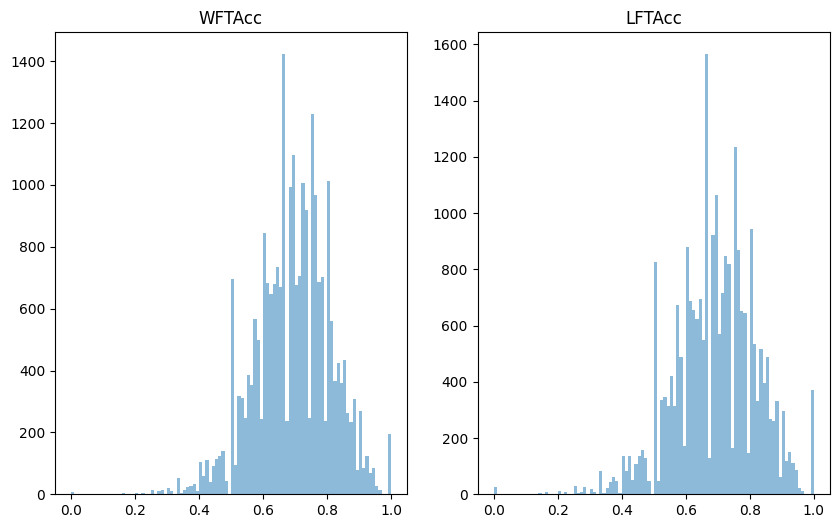

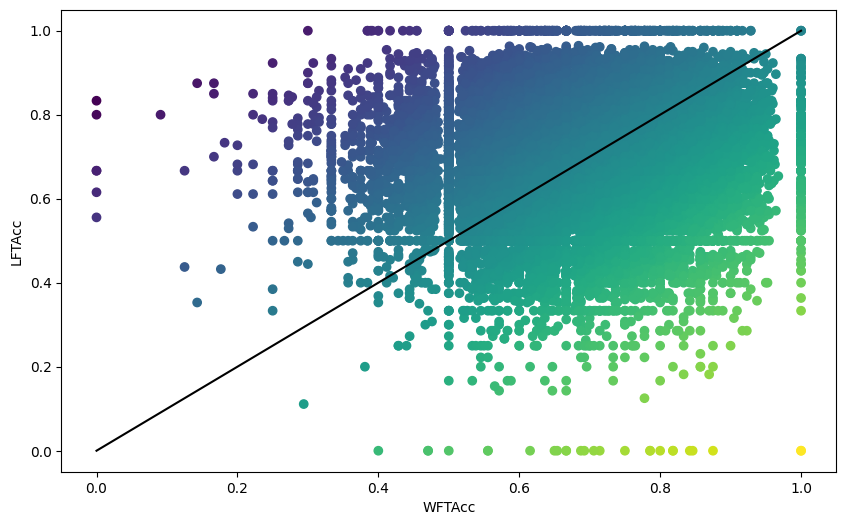

In [9]:
# Check how important is free throw ratio
df["Result"] = df["WScore"] - df["LScore"]
df_close_game = df[df["Result"] < 5]

# Compare distributions of WATR and LFTAcc
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)

#Now make a subplot inside a subplot
ax[0].hist(df_close_game['WFTAcc'], bins=100, alpha=0.5, label='WFTAcc', range=(0, 1))
ax[1].hist(df_close_game['LFTAcc'], bins=100, alpha=0.5, label='LFTAcc', range=(0, 1))
ax[0].set_title('WFTAcc')
ax[1].set_title('LFTAcc')

# Substract values and represent them ina scatterplot
df_close_game['WFTAcc-LFTAcc'] = df_close_game['WFTAcc'] - df_close_game['LFTAcc']
plt.figure(figsize=(10, 6))
plt.scatter(x=df_close_game['WFTAcc'], y=df_close_game['LFTAcc'], c=df_close_game['WFTAcc-LFTAcc'], cmap='viridis')
# Add diagonal line
plt.plot([0, 1], [0, 1], 'k-')
plt.xlabel('WFTAcc')
plt.ylabel('LFTAcc')

print(F"El {(df_close_game['WFTAcc-LFTAcc']>0).sum()/len(df_close_game['WFTAcc-LFTAcc'])} de los equipos que ganan tienen un WFTAcc mayor que el LFTAcc")
print(f"El {(df_close_game['WFTAcc-LFTAcc']<0).sum()/len(df_close_game['WFTAcc-LFTAcc'])} de los equipos que pierden tienen un WATR menor o igual que el LFTAcc")

Haciendo distintas exploraciones, de lo que es un *close game* podemos apreciar como los free throws no nos dan mucha información de quien puede llegar a ser el ganador de un partido, tanto en un partido desigualado, como en un partido de maxima igualdad

#### Asist Field Goal Ratio

El 0.6220045509492996 de los equipos que ganan tienen un WAFGR mayor que el LAFGR
El 0.3681469103320771 de los equipos que pierden tienen un WAFGR menor o igual que el LAFGR


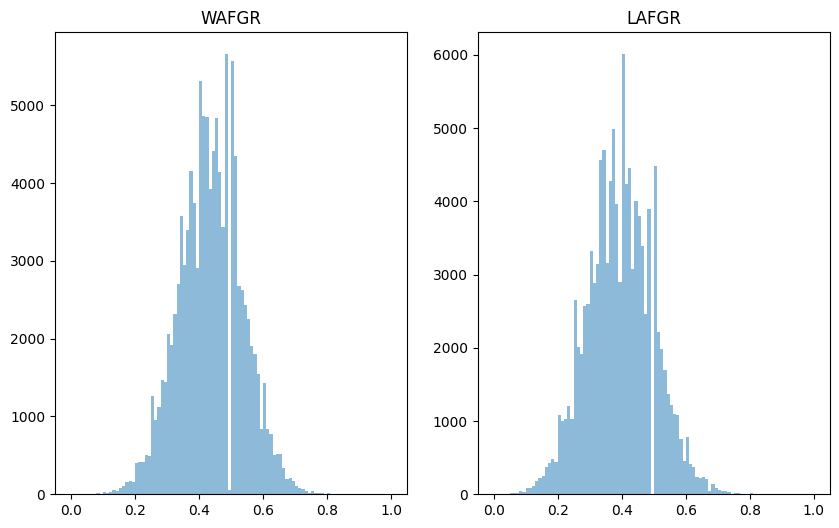

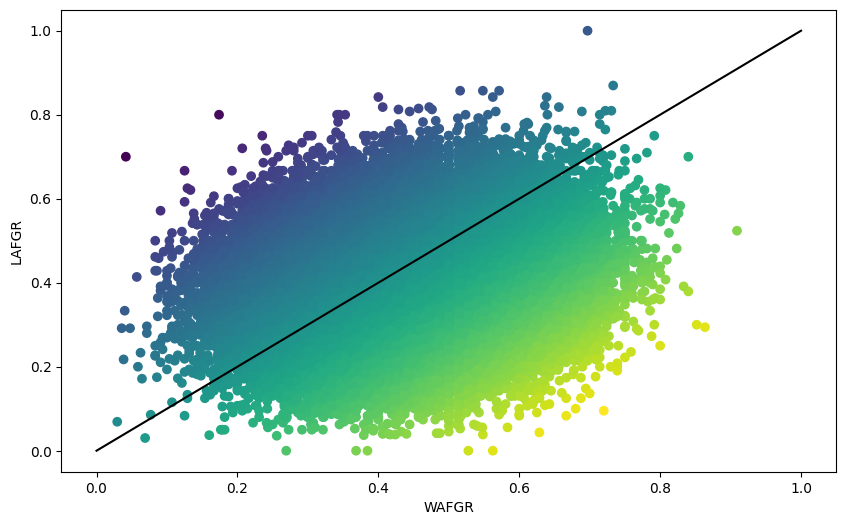

In [10]:
# Compare distributions of WATR and LAFGR
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WAFGR'], bins=100, alpha=0.5, label='WAFGR', range=(0, 1))
ax[1].hist(df['LAFGR'], bins=100, alpha=0.5, label='LAFGR', range=(0, 1))
ax[0].set_title('WAFGR')
ax[1].set_title('LAFGR')

# Substract values and represent them ina scatterplot
df['WAFGR-LAFGR'] = df['WAFGR'] - df['LAFGR']
plt.figure(figsize=(10, 6))
plt.scatter(x=df['WAFGR'], y=df['LAFGR'], c=df['WAFGR-LAFGR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 1], [0, 1], 'k-')
plt.xlabel('WAFGR')
plt.ylabel('LAFGR')

print(F"El {(df['WAFGR-LAFGR']>0).sum()/len(df['WAFGR-LAFGR'])} de los equipos que ganan tienen un WAFGR mayor que el LAFGR")
print(f"El {(df['WAFGR-LAFGR']<0).sum()/len(df['WAFGR-LAFGR'])} de los equipos que pierden tienen un WAFGR menor o igual que el LAFGR")

# Estudio de otras variables


Hipotesis:
* Cundo se domina 3 de las 5 categorias es dificil perder (%FG, %FT, Rebouds, TO, Ataques).
* El equipo con el mayor field goal percentage es victorioso 70%
* El equipo que obtiene más rebote es victorioso
* El equipo que más falta comete solo es ganador un 25% de las ocasiones
  



Basado en (https://www.stacknj.com/2021/11/07/most-important-statistics-in-winning-basketball-games/)

#### Field Goal Percentage

Incluye tiros normales y tiros de 3.
Observando la siguiente celda, podemos ver, como en tener una mayor precisión en los tiros de campo, supone acabar ganando un partido en el **81%** de las ocasiones

El 0.8106911754248738 de los equipos que ganan tienen un FGP mayor que el LFGP
El 0.18667780701130626 de los equipos que pierden tienen un WFGP menor o igual que el LFGP


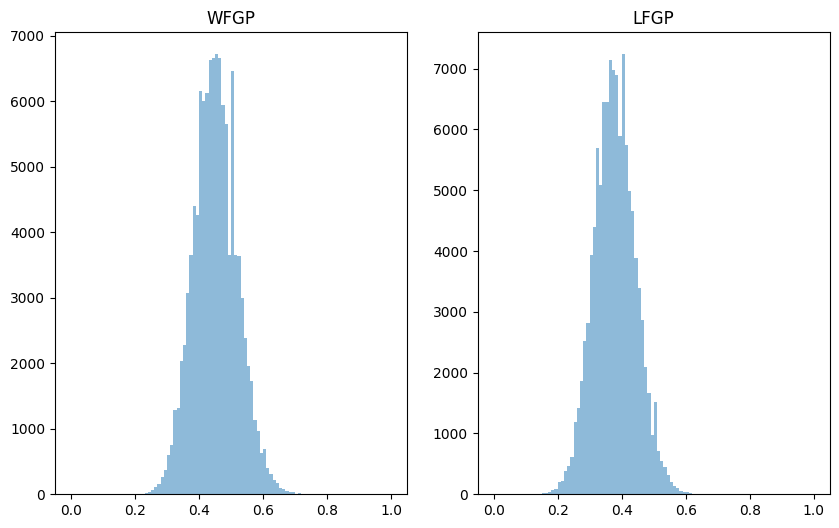

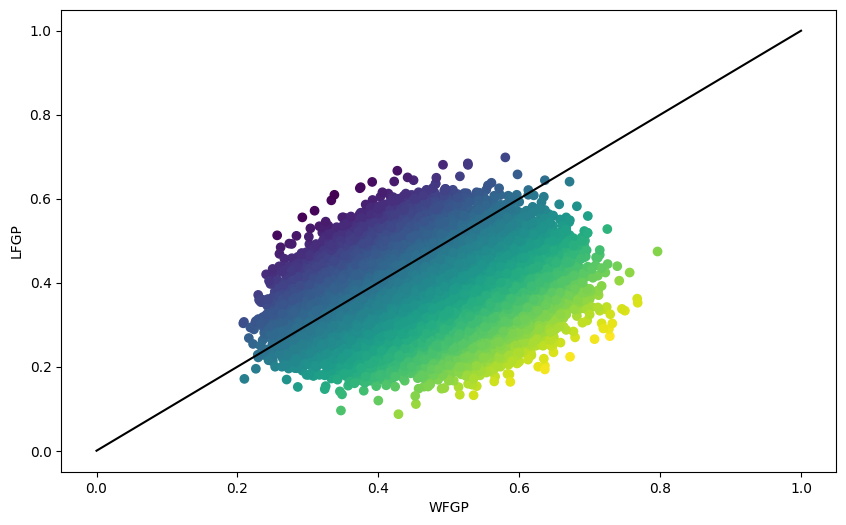

In [16]:
# Columna porcentaje field goals
df['WFGP'] = (df['WFGM']+df['WFGM3']) / (df['WFGA']+df['WFGA3'])
df['LFGP'] = (df['LFGM']+df['LFGM3']) / (df['LFGA']+df['LFGA3'])

# Compare distributions of WATR and LFGP
f, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
#Now make a subplot inside a subplot

ax[0].hist(df['WFGP'], bins=100, alpha=0.5, label='WFGP', range=(0, 1))
ax[1].hist(df['LFGP'], bins=100, alpha=0.5, label='LFGP', range=(0, 1))
ax[0].set_title('WFGP')
ax[1].set_title('LFGP')

# Substract values and represent them ina scatterplot
df['WFGP-LFGP'] = df['WFGP'] - df['LFGP']
plt.figure(figsize=(10, 6))
plt.scatter(x=df['WFGP'], y=df['LFGP'], c=df['WFGP-LFGP'], cmap='viridis')
# Add diagonal line
plt.plot([0, 1], [0, 1], 'k-')
plt.xlabel('WFGP')
plt.ylabel('LFGP')

print(F"El {(df['WFGP-LFGP']>0).sum()/len(df['WFGP-LFGP'])} de los equipos que ganan tienen un FGP mayor que el LFGP")
print(f"El {(df['WFGP-LFGP']<0).sum()/len(df['WFGP-LFGP'])} de los equipos que pierden tienen un WFGP menor o igual que el LFGP")

### Rebotes

Para saber si un equipo domina los rebotes, calcularemos el porcentaje de rebotes que recuperan. El objetivo es determinar si capturando más rebotes en ambas facetas del juego nos ayuda a determinar quien se alza con la victoria.

Conclusiión, dominar la estadistica de los rebotes esta relacionada con el **65%** de los casos victoriosos

El 0.6562611107160634 de los equipos que ganan tienen un FGP mayor que el FGP
El 0.2998471165469672 de los equipos que pierden tienen un WAllR menor o igual que el LAllR


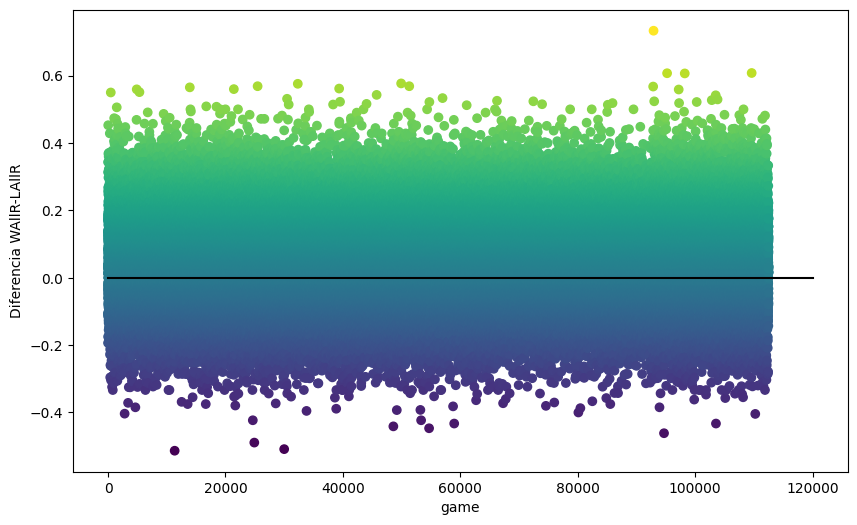

In [17]:
df['WAllR'] = (df['WOR']+df['WDR']) / (df['WOR']+df['WDR']+df['LOR']+df['LDR'])
df['LAllR'] = 1 - df['WAllR']

ax[0].hist(df['WAllR'], bins=100, alpha=0.5, label='WAllR', range=(0, 1))
ax[1].hist(df['LAllR'], bins=100, alpha=0.5, label='LAllR', range=(0, 1))
ax[0].set_title('WAllR')
ax[1].set_title('LAllR')

df['WAllR-LAllR'] = df['WAllR'] - df['LAllR']
# Substract values and represent them ina scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x=list(range(len(df))), y=df['WAllR-LAllR'], c=df['WAllR-LAllR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 120_000], [0, 0], 'k-')
plt.xlabel('game')
plt.ylabel('Diferencia WAllR-LAllR')
print(F"El {(df['WAllR-LAllR']>0).sum()/len(df['WAllR-LAllR'])} de los equipos que ganan tienen un FGP mayor que el FGP")
print(f"El {(df['WAllR-LAllR']<0).sum()/len(df['WAllR-LAllR'])} de los equipos que pierden tienen un WAllR menor o igual que el LAllR")

### Turnovers

En el **56%** de los partidos el equipo perdedor ha tenido más turnovers que el equipo ganador

El 0.36104494062433334 de los equipos que ganan tienen un FGP mayor que el FGP
El 0.5610556069117543 de los equipos que pierden tienen un WAllR menor o igual que el LAllR


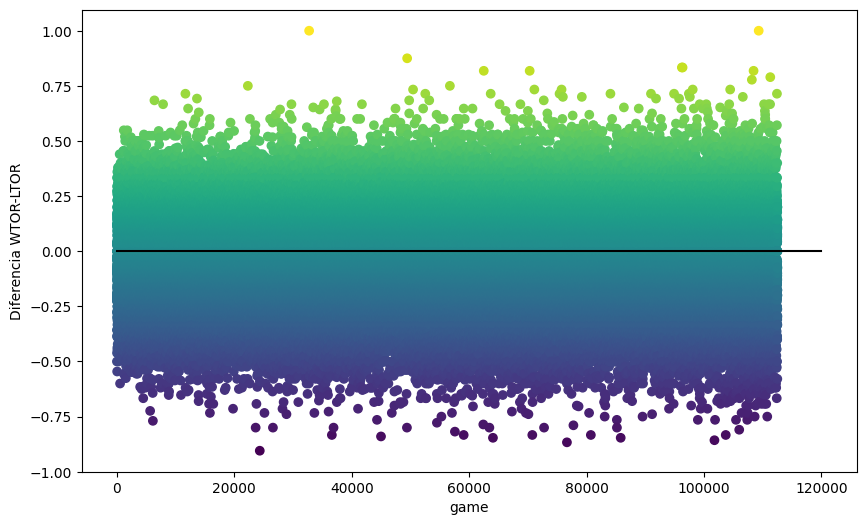

In [18]:
df['WTOR'] = df['WTO'] / (df['WTO']+df['LTO'])
df['LTOR'] = df['LTO'] / (df['WTO']+df['LTO'])

df['WTOR-LTOR'] = df['WTOR'] - df['LTOR']

plt.figure(figsize=(10, 6))
plt.scatter(x=list(range(len(df))), y=df['WTOR-LTOR'], c=df['WTOR-LTOR'], cmap='viridis')
# Add diagonal line
plt.plot([0, 120_000], [0, 0], 'k-')
plt.xlabel('game')
plt.ylabel('Diferencia WTOR-LTOR')
print(F"El {(df['WTOR-LTOR']>0).sum()/len(df['WTOR-LTOR'])} de los equipos que ganan tienen un FGP mayor que el FGP")
print(f"El {(df['WTOR-LTOR']<0).sum()/len(df['WTOR-LTOR'])} de los equipos que pierden tienen un WAllR menor o igual que el LAllR")

### Determinamos si siendo superior en 3 de las 5 te permite ganar el partido
En el **53%** de los partidos el equipo ganador ha conseguido ser superior en Porcentaje de Field Goals y en Rebotes defensivos/ofensivos

In [22]:
df[(df['WFGP-LFGP'] > 0) &  (df['WAllR-LAllR'] > 0)].shape[0] / df.shape[0]

0.539856360662732

# Generación de ranking por cada estadística
Pipeline:
1. Iterar dataset por season
2. Omitir los primeros 5 partidos de cada equipo
3. Por cada enfrentamiento generar:
   1. Las medias, de lo que lleva de temporada en cada registro estadístico previo al partido
      - Escalar el valor
      - Construir Ranking
4. Esto genera la siguiente tabla:



| TeamA | AggFGM_A (0-1) | AggFGA3_A (0-1) | .... | TeamB | AggFGM_B (0-1) | AggFGM_B (0-1)|
|-------|----------------|-----------------|------|-------|----------------|---------------|
| ... | ... | ... | ... | ... | ... | ... |

# Detectar rachas por equipos

# Predicción de estaditicas
Desarrollar un Pipeline, que en función de que suele intentar un equipo/como suele jugar (independientemente de si le sale o no) se capaz de generar una predicción de como serán dichas estadísticas para un enfrentamiento en concreto

A partir de la predicción de estadísticas determinar quien será el ganador....